<center> <h1>IBM Data Science Experience with PixieDust </h1> <br/> </center>

<center> <h3>Analyze data and build a dashboard with Spark, notebooks, and PixieDust</h3> <br/> </center>

Interactive notebooks are powerful tools for fast and flexible experimentation and data analysis. Notebooks can contain live code, static text, equations and visualizations. In this lab, we will walk through how to use PixieDust with Spark and Notebooks to analyze open data around police incidents in San Francisco and then build charts and maps to discover insights. We will then show how to build a dashboard that drills down into specific areas and how to combine multiple data sources like crime or speeding zones to extract even more insights..  

<center>
![pixiedust](https://developer.ibm.com/clouddataservices/wp-content/uploads/sites/85/2017/03/pixiedust200.png)
<br/>
</center>

<center>
Learn more about PixieDust [Here](https://www.ibm.com/analytics/us/en/watson-data-platform/pixiedust/)
</center>
<center>
You may access the complete tutorial with step by step instructions here: [https://www.slideshare.net/DTAIEB/pixie-dust-overview](https://www.slideshare.net/DTAIEB/pixie-dust-overview)  
  
</center>
<br/>


In [12]:
# Licensed under the Apache License, Version 2.0 (the "License"); you may
# not use this file except in compliance with the License. You may obtain
# a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.

In [13]:
# We install the prerequisites using the `!pip install` syntax here.
# In some cases, running pip install from a notebook may require a one-time kernel restart. Check the output for messages.
# If instructed to restart the kernel, from the notebook toolbar menu: • Go to > Kernel > Restart • Click Restart in the confirmation dialog
# Note: The status of the kernel briefly flashes near the upper right corner, alerting when it is Not Connected, Restarting, Ready, etc. 
!pip install --upgrade pixiedust

Processing ./.cache/pip/wheels/41/4c/20/08a843440aaeffc976c1848c9eb44be6ec68dcd964421ec6f7/pixiedust-1.1.18-py3-none-any.whl
  Using cached geojson-2.5.0-py2.py3-none-any.whl (14 kB)
  Using cached lxml-4.6.2-cp37-cp37m-manylinux1_x86_64.whl (5.5 MB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Processing ./.cache/pip/wheels/11/af/f9/b3fc6166b9a794dcde7e64b183d48d495aa0f5e469d73ef385/mpld3-0.5.2-py3-none-any.whl
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached matplotlib-3.3.3-cp37-cp37m-manylinux1_x86_64.whl (11.6 MB)
  Using cached importlib_metadata-3.4.0-py3-none-any.whl (10 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.2-p

In [20]:
!pip install --upgrade bokeh==0.12.6

Processing ./.cache/pip/wheels/cb/be/45/8c4dd42c6e635b711f9e9c76bdd49b862eaf310e2d42764af0/bokeh-0.12.6-py3-none-any.whl
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
Processing ./.cache/pip/wheels/48/2c/f6/fb99e643be41b44f6da2d10594d9a37edc1a1ba919424bd36c/bkcharts-0.2-py3-none-any.whl
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
Processing ./.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653/PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl
  Using cached tornado-6.1-cp37-cp37m-manylinux2010_x86_64.whl (428 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached MarkupSafe-1.1.1-cp37-cp37m-manylinux1_x86_64.whl (27 kB)
  Using cached urllib3-1.26.2-py2.py3-none-any.whl (136 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached idna-2.10-py2.py3-none-any.w

In [21]:
# Before, you can use the PixieDust library it must be imported into the notebook.
# This notebook requires version 1.0.6
import pixiedust

In [22]:
!pip install --user --upgrade pixiedust

ERROR: Can not combine '--user' and '--target'


## Import San Francisco Police incidents data into the Notebook
Source: [San Francisco Open Data](https://datasf.org/opendata)
> Take a moment to explore all the data available at this site

In [23]:
# With PixieDust, you can easily load CSV data from a URL into a PySpark DataFrame in the notebook.

incidents = pixiedust.sampleData("https://ibm.box.com/shared/static/mdmxht2b31su8ehioccec8w2buki9f8u.csv")

Creating pySpark DataFrame for 'https://ibm.box.com/shared/static/mdmxht2b31su8ehioccec8w2buki9f8u.csv'. Please wait...
Loading file using 'SparkSession'
Successfully created pySpark DataFrame for 'https://ibm.box.com/shared/static/mdmxht2b31su8ehioccec8w2buki9f8u.csv'


# Initial exploration

After successfully importing PixieDust and loading the sample data, we can use the ***display*** API to quickly browse through and visualize the data to see if we can obtain any immediate insights.  

For example:

### Explore the schema and browse the data

>  Select _DataFrame Table_ icon in the display widget


### In which police district do the most police incidents occur?

> Choose the _Chart_ icon in the display widget and select `(Pie Chart - Options: Keys = PdDistrict, Values = IncidntNum, Aggregation = Count)`

We can also dig one level deeper by clustering by how each incident was resolved:

> Choose the _Chart_ icon in the display widget and select `(Bar Chart - Options: Keys = PdDistrict, Values = IncidntNum, Aggregation = Count - Cluster By: Resolution)`

### On what day of the week do the most police incidents occur?

> Choose the _Chart_ icon in the display widget and select `(Bar Chart - Options: Keys = DayOfWeek, Values = IncidntNum, Aggregation = Count)`

Since the height of the bars are so similar, try `Pie Chart - Options: Keys = DayOfWeek, Values = IncidntNum, Aggregation = Count)`

Take a moment to explore the possibility of the Display API by watching this [video](https://www.youtube.com/watch?v=FoOHFlkCaXI) 


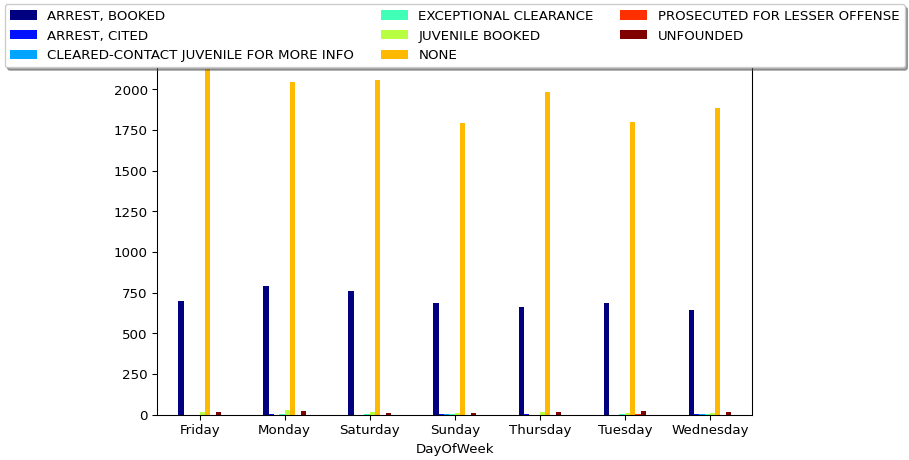

In [25]:
display(incidents)

# More data Exploration and Hypothesis
Immediately, we can identify a couple of areas of interest in our data without having to write a single line of code:

1) Most incidents happen in the Southern  police district, and

2) The number of incidents is approximately the same for each day, ranging from 13-15% of the total per day.

We can also see that our data needs some cleansing if we want to make analysis easier.  Specifically:

- The `Time` field is a string, so we'll need to add an `Hour` column if we want to see the time of day when most incidents occur, and
- The `DayOfWeek` values are rendered in alphabetical order by default instead of chronological order, so we should rename them to make it easier to see how the number of incidents changes over the course of the week, and
- We should condense the outcome types of each police accident if we want to see the most common resolutions of police incidents in each police district, since the clustering above was unclear.

Let's cleanse the data and re-investigate before moving on:

> Note: the next cell is using PySpark APIs to manipulate the data. You can find more information on these APIs [here](http://spark.apache.org/docs/1.6.0/api/python/pyspark.sql.html)

In [26]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

# Get the hour value of a time string
# e.g. getHour("05:30") = 5
def getHour(s):
    return int(s.split(':')[0])

hr_udf = udf(getHour,IntegerType())

# Rename weekdays to enable mini time-series analysis
incidents = incidents.na.replace\
    (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],\
    ['1-Mon','2-Tues','3-Wed','4-Thur','5-Fri','6-Sat','7-Sun'],\
    'DayOfWeek')

# Add Hour column and refine outcomes from police incidents
incidents = incidents.withColumn("Hour",hr_udf(incidents['Time']))\
    .withColumn("Res",\
    udf(lambda x: 'Arrest' if 'ARREST' in x else 'No Resolution' if x == 'NONE' else 'Other',StringType())\
    (incidents['Resolution']))


## We are now ready for more data exploration
### Hypothesis: Do incidents in one police district result in more arrests than other police districts?

```
(Bar Chart - Options: Keys = PdDistrict, Values = IncidntNum, Aggregation = Count, Cluster By: Res)
```
I find the `horizontal` orientation better for showing the Police Districts.

### Question: How does the number of incidents change over the course of the week?

```
(Line Chart - Options: Keys = DayOfWeek, Values = IncidntNum, Aggregation = Count)
```


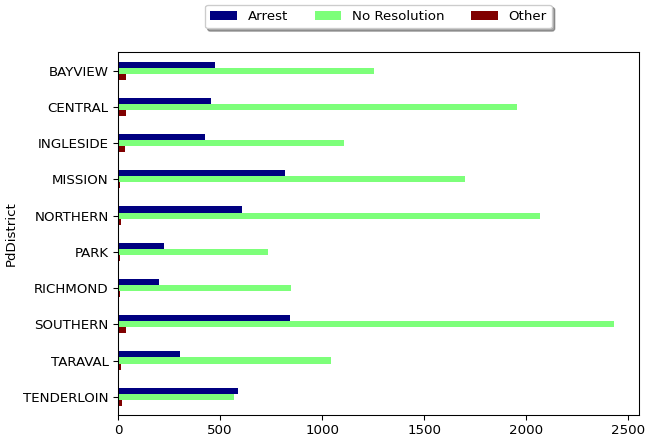

In [27]:
display(incidents)

## What have we learned
A few lines of code makes it a lot easier to see that:

1) Incidents in the Mission and Southern police districts are much more likely to result in arrest than all other districts, and

2) The number of incidents declines slightly during the middle of the week, through Thursday, but increases again through Saturday.

## Now let's focus on the Mission police district using some friendly SQL notation:

In [28]:
incidents.registerTempTable("incidents")
mission = sqlContext.sql("SELECT * FROM incidents WHERE PdDistrict='MISSION'")

### Question: Where in Mission do most incidents happen?

```
(Map - Options: Keys = [X,Y], Values = IncidntNum, Aggregation = Count,
Renderer: mapbox, kind: chloropleth-cluster)
```

### Question: What time of day do most incidents occur?

```
(Line Chart - Options: Keys = Hour, Values = IncidntNum, Aggregation = Count)
```


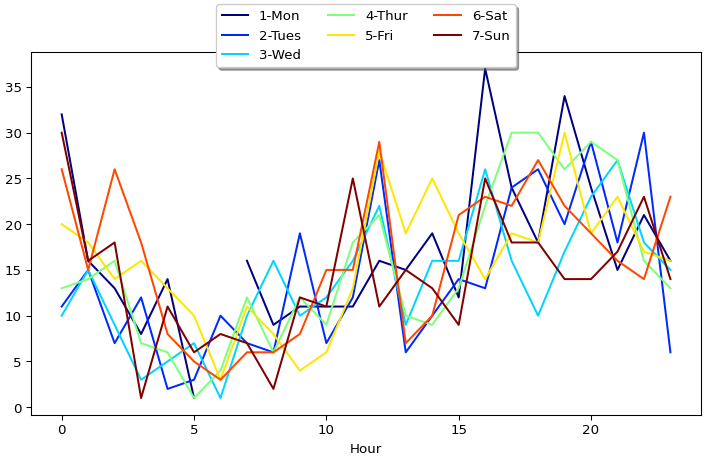

In [29]:
display(mission)

## What have we learned:
Most of the results from looking at the incident times are unsurprising:

- Number of incidents drop sharply very early morning (people probably sleeping),
- Steady increase in number of incidents until noon,
- Fairly high numbers from 3:00 PM until 8:00 PM,
- Surprisingly, incidents decline after 8:00PM.

The interesting thing here is the fact that the peaks are at noon and from 3:00PM until 8:00 PM, as one might expect the later evening times to be more problematic.

# Further questions

In analyzing the geographical data, we can see a couple of clusters where incidents occur more frequently in The Mission - the southeastern corner looks particularly crowded.  Some useful questions to ask at this point are:

### Do certain streets effect on the number of incidents?

### Are there more incidents in areas at the borders of police districts?

### Do police calming devices reduce the number of incidents?

We can test these hypotheses in two ways:

1) Download datasets for crime data and police calming in San Francisco and simply use the `display` API to visualize crime zones and areas with police calming devices separately.

2) Build a **Pixie App**, which encapsulates everything we have discussed thus far into an interactive way to explore multiple views of the data.

Only basic HTML and JavaScript are needed to write a Pixie App, so you don't have to learn any new languages or frameworks.  In particular, a Pixie App will allow us to overlay mapping layers, and therefore give us a clearer view into the problem we are investigating.

# Building the PixieApp Dashboard

### What you'll need:
- Mapbox token: A Mapbox token is included in the notebook, for now. To get your own visit [Mapbox](https://www.mapbox.com/)
- Mapbox layers Documentation: [circle](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-circle), [fill](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-fill), [symbols](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-symbol)
- Mapbox Maki Icons: [https://www.mapbox.com/maki-icons](https://www.mapbox.com/maki-icons)
- Browse the data on [San Francisco Open Data](https://datasf.org/opendata) to get the GeoJSON url
- Some understanding of [Jinja2 template](http://jinja.pocoo.org/docs/dev/templates)
- A Quick read of [PixieApp documentation](https://ibm-watson-data-lab.github.io/pixiedust/pixieapps.html)

### FAQ about the code below:
- How do I get the pixiedust options in `self.mapJSONOptions`?
> - Call `display()` on a new cell  
> - Graphically select the options for your chart  
> - Select "View"/"Cell Toolbar"/"Edit Metadata" menu  
> - Click on the “Edit Metadata” button and copy the pixiedust metadata  
- What's the `self.setLayers` call for?
> This is a method from the MapboxBase class used to specify the custom layer definitions array.  
> The fields are:  
>  - name: Layer name  
>  - url: geojson url to download the data from
>  - type: (optional) style type e.g Symbol. If not defined, then default value will be infered from geojson geometry
>  - paint: (optional) paint style, see appropriate documentation e.g. [circle](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-circle)  
>  - layout: (optional) layout style, see appropriate documentation e.g. [fill](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-fill)
- How do I find new layer data to add?
> Just go to [San Francisco Open Data](https://datasf.org/opendata), browse the data and click on the export button. You should see a geojson link among others (warning: not all datasets have a geojson link, if you don't find it, then move on to another one)
- What does the `mainScreen` method do?
> This is a PixieApp View associated with the default route. See [PixieApp documentation](https://ibm-watson-data-lab.github.io/pixiedust/pixieapps.html) for more information.
- What's the {{...}} notation in the mainScreen markup for?
> This is a Jinja2 template notation to call server side Python code. See [Jinja2 template](http://jinja.pocoo.org/docs/dev/templates) for more info

In [30]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class SFDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
          "mapboxtoken": "pk.eyJ1IjoiYXBpc2NoZG8iLCJhIjoiY2o2cXkxMjUxMDMyaTJ3bGEyajFsZ3Y4cSJ9.mL2PT0XH2vrNiDozb7gO0w",
          "chartsize": "90",
          "aggregation": "SUM",
          "rowCount": "500",
          "handlerId": "mapView",
          "rendererId": "mapbox",
          "valueFields": "IncidntNum",
          "keyFields": "X,Y",
          "basemap": "light-v9"
        }
        self.setLayers([
        {
            "name": "Police calming",
            "url": "https://data.sfgov.org/api/geospatial/ddye-rism?method=export&format=GeoJSON",
            "type": "symbol",
            "layout": {
                "icon-image": "police-15",
                "icon-size": 1.5
            }
        },
        {
            "name": "Police Districts",
            "url": "https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=GeoJSON"
        },
        {
            "name": "Crimes",
            "url": "https://data.sfgov.org/api/geospatial/ms8q-rzqw?method=export&format=GeoJSON",
            "paint":{
                "fill-color": "rgba(255,182,193,0.5)"
            }
        }
        ])
        
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])
    
    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing San Francisco Public Safety data with PixieDust</span></center>
    <center><span style="font-size:large"><a href="https://datasf.org/opendata" target="new">https://datasf.org/opendata</a></span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>      
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""
    
SFDashboard().run(incidents,runInDialog="false")

### Learn more about PixieDust
If you'd like to learn more about other PixieDust features explore the [Welcome to PixieDust notebook](https://apsportal.ibm.com/exchange/public/entry/view/5b000ed5abda694232eb5be84c3dd7c1).